In [45]:
import pandas as pd

data = pd.read_csv("AnimeStatDataset.csv", delimiter=";")
data.head()

,Main_Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers
0,MAPPA,24,8.561,110,13,2755845,93161,1.809780e+13
1,C-Station,13,8.501,145,1091,238832,3105,1.052540e+11
2,White Fox,12,8.431,180,183,969121,13012,5.687810e+11
3,Studio Bind,11,8.361,227,95,1438841,36751,8.876810e+11
4,8bit,12,8.361,231,161,1033610,10879,5.985960e+11


<Axes: ylabel='Frequency'>

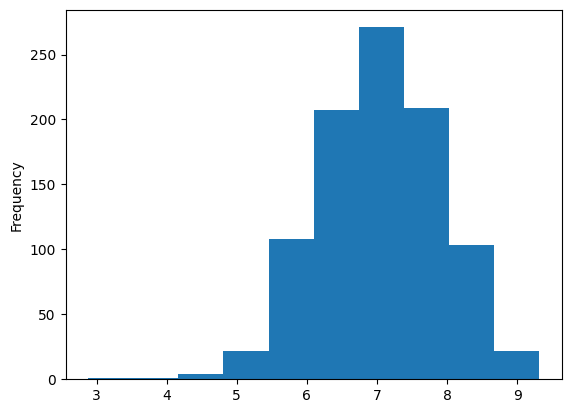

In [ ]:
data["Rating Score"].plot(kind="hist")

<Axes: ylabel='Frequency'>

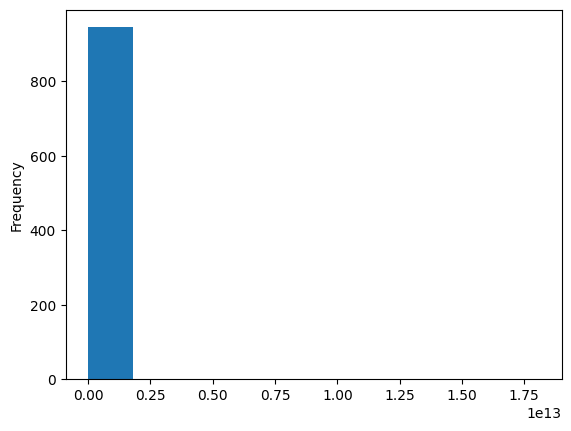

In [47]:
data["Reviewers"].plot(kind="hist")

In [48]:
import matplotlib.pyplot as plt
import numpy as np
# data['normalize_rating'] = (data['Rating Score'] - data['Rating Score'].min()) / (data['Rating Score'].max() - data['Rating Score'].min())
# data['normalize_reviewers'] = (data['Reviewers'] - data['Reviewers'].min()) / (data['Reviewers'].max() - data['Reviewers'].min())

data['log_norm_rating'] = np.log1p(data['Rating Score'])
data['log_norm_reviewers'] = np.log1p(data['Reviewers'])

In [80]:
from sklearn.cluster import KMeans
cluster_features = ["log_norm_rating", "log_norm_reviewers"]

n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42)

data["Cluster"] = kmeans.fit_predict(data[cluster_features])

# plt.scatter(data["log_norm_rating"], data["log_norm_reviewers"], c=data["Cluster"], cmap='viridis', alpha=0.6)


In [85]:
data['Category'] = data['Cluster'].replace({0: 'Best', 1: 'Bad', 2: 'Good', 3: "Medium"})

data.head()

,Main_Studio,Episodes,Rating Score,Rating Score Rank,Popularity Rank,Members,Favorites,Reviewers,log_norm_rating,log_norm_reviewers,Cluster,Category
0,MAPPA,24,8.561,110,13,2755845,93161,1.809780e+13,2.257692,30.526811,0,Best
1,C-Station,13,8.501,145,1091,238832,3105,1.052540e+11,2.251397,25.379642,0,Best
2,White Fox,12,8.431,180,183,969121,13012,5.687810e+11,2.244002,27.066761,0,Best
3,Studio Bind,11,8.361,227,95,1438841,36751,8.876810e+11,2.236552,27.511878,0,Best
4,8bit,12,8.361,231,161,1033610,10879,5.985960e+11,2.236552,27.117853,0,Best


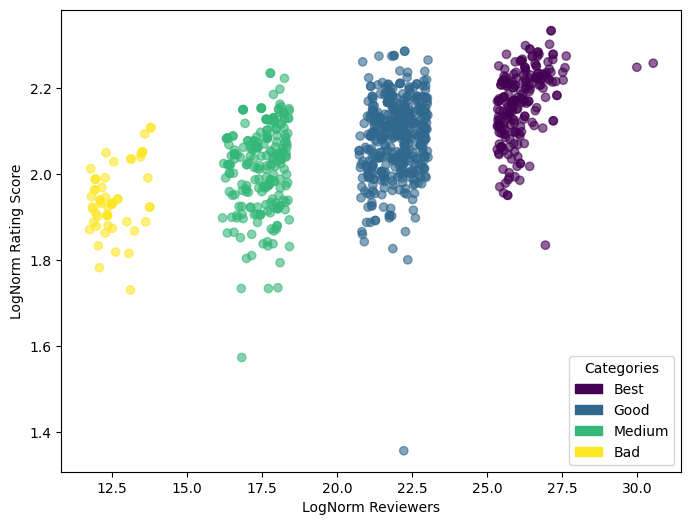

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 6))
# plt.title("Clustering Studio")
plt.xlabel("LogNorm Reviewers")
plt.ylabel("LogNorm Rating Score")

# Map categories to unique colors
categories = data["Category"].unique()
color_map = {cat: i for i, cat in enumerate(categories)}

# Scatter plot with colors based on categories
scatter = plt.scatter(
    x=data["log_norm_reviewers"], 
    y=data["log_norm_rating"], 
    c=data["Category"].map(color_map),  # Convert categories to color indices
    cmap='viridis', 
    alpha=0.6
)

# Create legend manually
legend_handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cat) for cat, i in color_map.items()]

# Add legend
plt.legend(handles=legend_handles, title="Categories", loc="lower right")

plt.show()

In [84]:
pd.pivot_table(data, values="Rating Score", index="Cluster", aggfunc="mean")

,Rating Score
Cluster,
0,7.736849
1,5.983241
2,7.072851
3,6.547894


In [88]:
data.to_csv("full_complete_clasisifaction.csv")

In [118]:
import pandas as pd

# Load the dataset
data_anime = pd.read_csv("FullCompleteDataset.csv", delimiter=";")

# Create an empty list to store sampled rows
sampled_data = []

# Loop through each unique status and take a sample of 10 rows
for status in data_anime["Status"].unique():
    sampled_rows = data_anime.loc[data_anime["Status"] == status].sample(30)
    sampled_data.append(sampled_rows)

# Concatenate all sampled rows into a new DataFrame
new_dataset = pd.concat(sampled_data)

# Save the new dataset to a CSV file
new_dataset.to_csv("Sampled_Anime_Dataset.csv", index=False)


In [119]:
# Display the first few rows of the new dataset
new_dataset.head(10)

,year,season,jp_title,img,Japanese,Episodes,Starting,Ending,Producers,Studios,Main Studio,Source,Age Rating,Rating Score,Reviewers,Rating Score Rank,Popularity Rank,Members,Favorites,Status
132,2021,summer,Fumetsu no Anata e,https://cdn.myanimelist.net/images/anime/1880/...,不滅のあなたへ,20,12 Apr 2021,30 Aug 2021,"NHK, Kodansha, NHK Enterprises",Brain's Base,Brain's Base,Manga,R - 17+ (violence & profanity),8.34,3.903200e+11,244,199.0,922273,15100,Best
409,2022,fall,Bocchi the Rock!,https://cdn.myanimelist.net/images/anime/1448/...,ぼっち・ざ・ろっく！,12,9 Oct 2022,25 Dec 2022,"Aniplex, Houbunsha",CloverWorks,CloverWorks,4-koma manga,PG-13 - Teens 13 or older,8.76,4.031080e+11,42,336.0,668923,32085,Best
598,2023,summer,Zom 100: Zombie ni Naru made ni Shitai 100 no ...,https://cdn.myanimelist.net/images/anime/1384/...,ゾン100～ゾンビになるまでにしたい100のこと～,12,9 Jul 2023,26 Dec 2023,"Shogakukan-Shueisha Productions, Mainichi Broa...",BUG FILMS,BUG FILMS,Manga,R - 17+ (violence & profanity),7.75,2.851540e+11,1152,382.0,606897,4116,Best
780,2024,spring,Kaijuu 8-gou,https://cdn.myanimelist.net/images/anime/1370/...,怪獣8号,12,13 Apr 2024,29 Jun 2024,"TV Tokyo, Khara, Nippon Columbia, TOHO animati...",Production I.G,Production I.G,Manga,PG-13 - Teens 13 or older,8.30,3.042310e+11,276,429.0,551507,5412,Best
151,2021,summer,Otome Game no Hametsu Flag shika Nai Akuyaku R...,https://cdn.myanimelist.net/images/anime/1088/...,乙女ゲームの破滅フラグしかない悪役令嬢に転生してしまった…X,12,3 Jul 2021,18 Sep 2021,Nichion,SILVER LINK.,SILVER LINK.,Light novel,PG-13 - Teens 13 or older,7.26,1.119120e+11,3070,1018.0,256322,1078,Best
373,2022,summer,Kuro no Shoukanshi,https://cdn.myanimelist.net/images/anime/1517/...,黒の召喚士,12,9 Jul 2022,24 Sep 2022,"flying DOG, Bushiroad, Docomo Anime Store, bil...",Satelight,Satelight,Light novel,PG-13 - Teens 13 or older,7.04,1.319160e+11,4177,987.0,263723,1128,Best
480,2023,winter,Tondemo Skill de Isekai Hourou Meshi,https://cdn.myanimelist.net/images/anime/1661/...,とんでもスキルで異世界放浪メシ,12,11 Jan 2023,29 Mar 2023,dugout,MAPPA,MAPPA,Light novel,PG-13 - Teens 13 or older,7.65,1.445020e+11,1424,947.0,271678,2043,Best
423,2022,fall,Isekai Ojisan,https://cdn.myanimelist.net/images/anime/1743/...,異世界おじさん,13,6 Jul 2022,8 Mar 2023,"Movic, AT-X, Sammy, BS11, Kadokawa Media House...",Atelier Pontdarc,Atelier Pontdarc,Web manga,PG-13 - Teens 13 or older,7.77,1.782300e+11,1106,646.0,389320,2168,Best
846,2024,summer,Tokidoki Bosotto Russia-go de Dereru Tonari no...,https://cdn.myanimelist.net/images/anime/1825/...,時々ボソッとロシア語でデレる隣のアーリャさん,12,3 Jul 2024,18 Sep 2024,"Sega, Delfi Sound, Kadokawa",Doga Kobo,Doga Kobo,Light novel,PG-13 - Teens 13 or older,7.60,1.972030e+11,1573,633.0,393855,4925,Best
3,2021,winter,Mushoku Tensei: Isekai Ittara Honki Dasu,https://cdn.myanimelist.net/images/anime/1530/...,無職転生 ～異世界行ったら本気だす～,11,11 Jan 2021,22 Mar 2021,"Frontier Works, TOHO, Magic Capsule, TOHO anim...",Studio Bind,Studio Bind,Light novel,R - 17+ (violence & profanity),8.36,8.876810e+11,227,95.0,1438841,36751,Best


In [53]:
for cluster in sorted(data.Cluster.unique()):
    print(data.loc[data.Cluster == cluster].sample(5).Main_Studio.tolist())

['CloverWorks', 'EMT Squared', 'Studio 3Hz', 'Tezuka Productions', 'Kinema Citrus']
['Toei Animation', 'Zexcs', 'Pie in the sky', 'Ascension', 'Kinema Citrus']
['David Production', 'Connect', 'Gekkou', 'SILVER LINK.', 'J.C.Staff']
['Signal.MD', 'LIDENFILMS', 'J.C.Staff', 'OLM', 'None found']


In [34]:
for cluster in sorted(data.Cluster.unique()):
    data_sampling = data.loc[data.Cluster == cluster]
    print(f"[Cluster {cluster} with {data_sampling.shape[0]} studios]")

    print("Rating Score", round(data_sampling["Rating Score"].mean(), 2))
    print("Max", round(data_sampling["Rating Score"].max(), 2))
    print("Min", round(data_sampling["Rating Score"].min(), 2))

    print("Reviewers", round(data_sampling["Reviewers"].mean()))
    print("Max", round(data_sampling["Reviewers"].max()))
    print("Min", round(data_sampling["Reviewers"].min()))

    print("\n")

    # print(data_sampling.Main_Studio.tolist()[:5])

[Cluster 0 with 75 studios]
Rating Score 7.38
Max 8.76
Min 6.03
Reviewers 124398733333
Max 154216000000
Min 100015000000


[Cluster 1 with 1 studios]
Rating Score 8.47
Max 8.47
Min 8.47
Reviewers 10474400000000
Max 10474400000000
Min 10474400000000


[Cluster 2 with 1 studios]
Rating Score 8.56
Max 8.56
Min 8.56
Reviewers 18097800000000
Max 18097800000000
Min 18097800000000


[Cluster 3 with 736 studios]
Rating Score 6.82
Max 8.83
Min 2.88
Reviewers 2578492239
Max 9974199741
Min 126126


[Cluster 4 with 13 studios]
Rating Score 8.0
Max 8.99
Min 5.26
Reviewers 512170923077
Max 571839000000
Min 446396000000


[Cluster 5 with 36 studios]
Rating Score 8.0
Max 8.96
Min 6.52
Reviewers 260846555556
Max 315582000000
Min 224744000000


[Cluster 6 with 12 studios]
Rating Score 8.33
Max 9.31
Min 7.36
Reviewers 651498166667
Max 731285000000
Min 598596000000


[Cluster 7 with 24 studios]
Rating Score 8.26
Max 8.81
Min 7.27
Reviewers 376440416667
Max 426563000000
Min 320283000000


[Cluster 8 with 4